In [2]:
import nltk
nltk.download('stopwords') # run this one time
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import numpy as np 
import re 
import spacy 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_json('Automotive_5.json', lines=True) 

In [4]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

# function to remove stopwords 
def remove_stopwords(rev):     
  rev_new = " ".join([i for i in rev if i not in stop_words])      
  return rev_new 

# remove short words (length < 3) 
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for 
                   w in x.split() if len(w)>2])) 
# remove stopwords from the text 
reviews = [remove_stopwords(r.split()) for r in df['reviewText']] 
# make entire text lowercase 
reviews = [r.lower() for r in reviews]

In [5]:
from nltk import FreqDist 

In [6]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  
  fdist = FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()),   
             'count':list(fdist.values())}) 
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms)      
  plt.figure(figsize=(20,5)) 
  ax = sns.barplot(data=d, x= "word", y = "count") 
  ax.set(ylabel = 'Count') 
  plt.show()

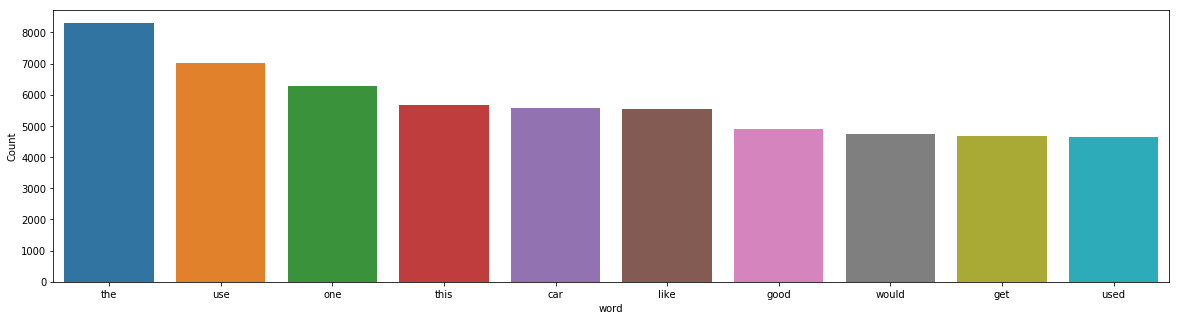

In [7]:
freq_words(reviews, 10)

In [8]:
nlp = spacy.load('en', disable=['parser', 'ner']) 

def lemmatization(texts, tags=['NOUN', 'ADJ']): 
       output = []        
       for sent in texts:              
             doc = nlp(" ".join(sent))                             
             output.append([token.lemma_ for token in doc if 
             token.pos_ in tags])        
       return output

In [9]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


In [14]:
npr =[]
for sent in reviews_2:
    npr.append(' '.join(sent))

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df = 0.9,min_df = 3,stop_words = 'english')
dtm = cv.fit_transform(npr)
LDA = LatentDirichletAllocation(n_components = 7,random_state = 42).fit(dtm)

for i,topic in enumerate(LDA.components_):
    print("THE TOP 10 WORDS FOR {}".format(i))
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])



C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


THE TOP 10 WORDS FOR 0
['new', 'use', 'great', 'water', 'time', 'towel', 'clean', 'good', 'product', 'car']
THE TOP 10 WORDS FOR 1
['ice', 'foam', 'winter', 'rear', 'snow', 'water', 'tank', 'seat', 'color', 'leather']
THE TOP 10 WORDS FOR 2
['gauge', 'pressure', 'time', 'charger', 'hose', 'use', 'unit', 'power', 'car', 'battery']
THE TOP 10 WORDS FOR 3
['little', 'plastic', 'great', 'install', 'tool', 'fit', 'good', 'easy', 'wiper', 'blade']
THE TOP 10 WORDS FOR 4
['fuel', 'gas', 'air', 'mile', 'oem', 'change', 'good', 'engine', 'filter', 'oil']
THE TOP 10 WORDS FOR 5
['easy', 'use', 'door', 'pad', 'quality', 'price', 'wax', 'great', 'good', 'product']
THE TOP 10 WORDS FOR 6
['trailer', 'headlight', 'white', 'good', 'device', 'wheel', 'bright', 'bulb', 'tire', 'light']
